In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('terrorismp1.csv')
"""
Can the Israeli Defense Forces draw useful insight from executed targets data to improve national security?
Can the IDF learn its terrorist opposition better through data of executed targets?
What questions will have to be answered moving forward?
"""

'\nCan the Israeli Defense Forces draw useful insight from executed targets data to improve national security?\nCan the IDF learn its terrorist opposition better through data of executed targets?\nWhat questions will have to be answered moving forward?\n\n'

Intro

In [24]:
print(df.dtypes, df.isnull().sum())

name             object
age               int64
date             object
where            object
region           object
affiliation      object
role             object
incrimination    object
circumstances    object
method           object
offenses          int64
terrorist         int64
dtype: object name             0
age              0
date             0
where            0
region           0
affiliation      0
role             6
incrimination    0
circumstances    0
method           0
offenses         0
terrorist        0
dtype: int64


In [2]:
#separating types of variables excluding target variable and dates
categorical_var = [i for i in df.select_dtypes(include = object) if i != 'name' and i != 'date']
numerical_var = [i for i in df.select_dtypes(exclude = object) if i != 'terrorist']

print('categorical variables:', categorical_var, '\n', 'numerical variables:', numerical_var)


categorical variables: ['where', 'region', 'affiliation', 'role', 'incrimination', 'circumstances', 'method'] 
 numerical variables: ['age', 'offenses']


In [3]:
df.isnull().sum()

name             0
age              0
date             0
where            0
region           0
affiliation      0
role             6
incrimination    0
circumstances    0
method           0
offenses         0
terrorist        0
dtype: int64

In [4]:

"""
Targets on average commit more than one offense
Based off the low std there is little difference between the amount of offenses each target committed

"""

df[numerical_var].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,83.0,27.060241,13.362077,4.0,18.0,23.0,33.5,62.0
offenses,83.0,1.421687,0.989216,0.0,1.0,1.0,2.0,3.0


EDA

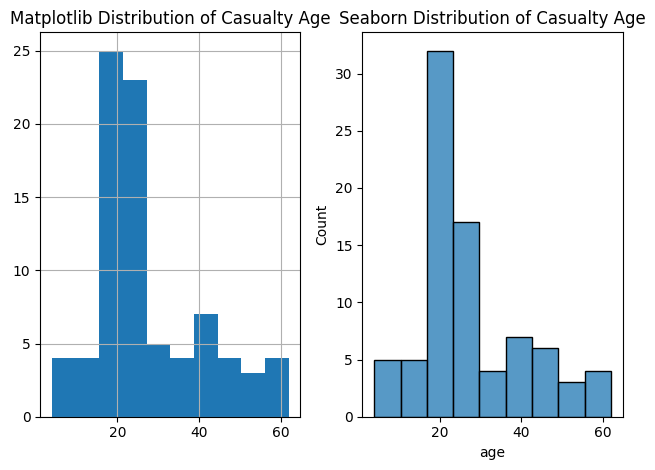

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)

#matplotlib histogram distribution of casualty ages
mathistoage = df['age'].hist(ax=axes[0])

#seaborn histogram distribution of casualty ages
histosnsage = sns.histplot(df['age'], ax=axes[1])

axes[0].set_title('Matplotlib Distribution of Casualty Age')
axes[1].set_title('Seaborn Distribution of Casualty Age')

plt.tight_layout()
plt.show()
#majority of the executed targets are between 18-27 years old
#The right skewed histogram shows that the militants possibly lack field experience.


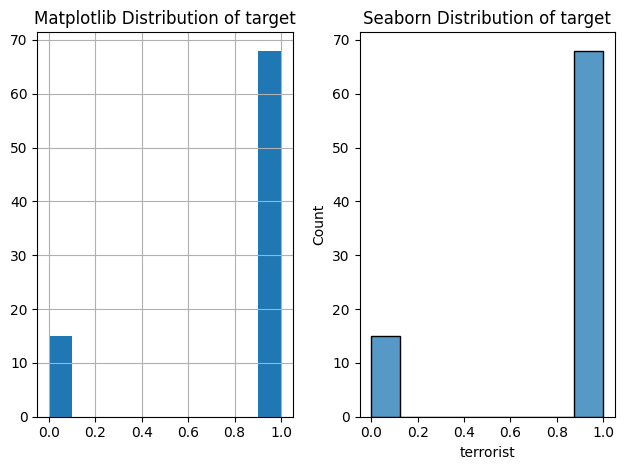

In [13]:
#the distiribution of our target variable shows that the IDF has limited civilian casualties when eliminating terrorists
fig, axes = plt.subplots(nrows=1, ncols=2)

#matplotlib histogram distribution of target
mathistoage = df['terrorist'].hist(ax=axes[0])

#seaborn histogram distribution of target variable
histosnsage = sns.histplot(df['terrorist'], ax=axes[1])

axes[0].set_title('Matplotlib Distribution of target')
axes[1].set_title('Seaborn Distribution of target')

plt.tight_layout()
plt.show()

In [ ]:
#how is IDF doing at keeping unaffaliated parties out of strikes
airstrikedf = df[df['method'] == 'Airstrike']
airstrikedf = airstrikedf.groupby('affiliation').agg(casualties = ('name', 'count')).reset_index()
airstrikedf

,affiliation,casualties
0,Al-Mujahideen Brigades,2
1,Hamas,1
2,PFLP,5
3,PIJ,13
4,Unaffiliated,11


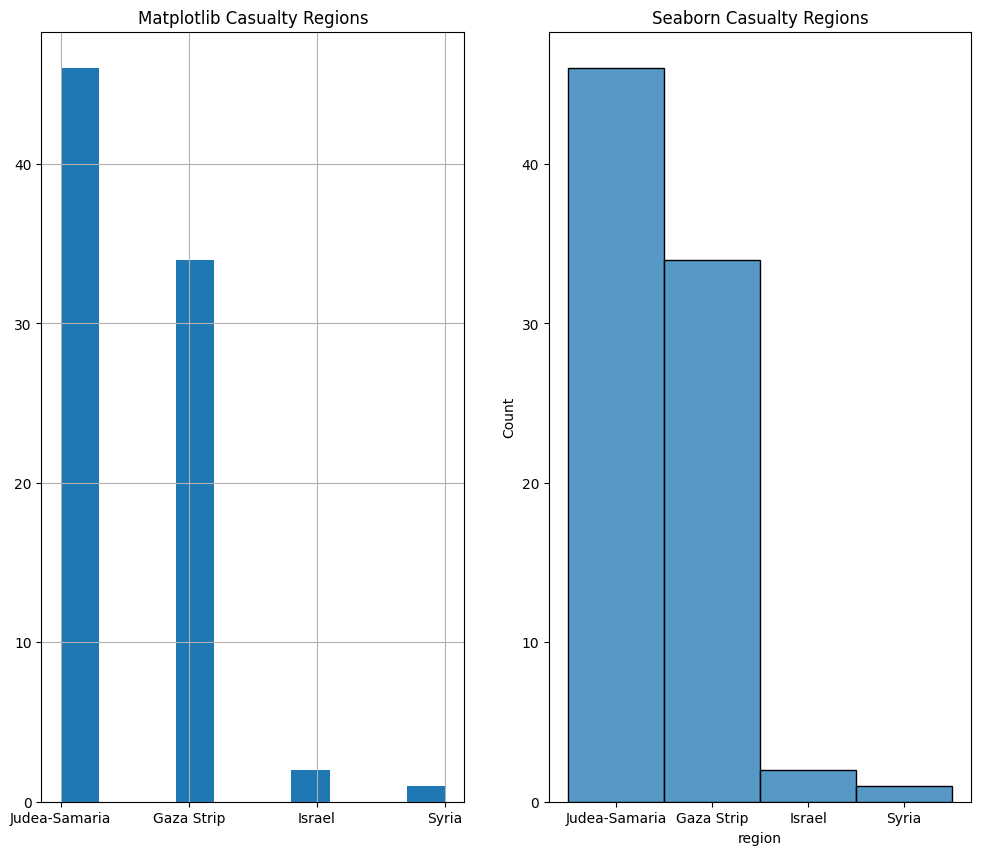

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,10))

#matplotlib histogram distribution of casualty ages
mathistoage = df['region'].hist(ax=axes[0])

#seaborn histogram distribution of casualty ages
histosnsage = sns.histplot(df['region'], ax=axes[1])

axes[0].set_title('Matplotlib Casualty Regions')
axes[1].set_title('Seaborn Casualty Regions')


plt.show()

#Most terrorist casualties fall in Judea Samaria (West Bank)
#Second most casualties fall in the Gaza Strip

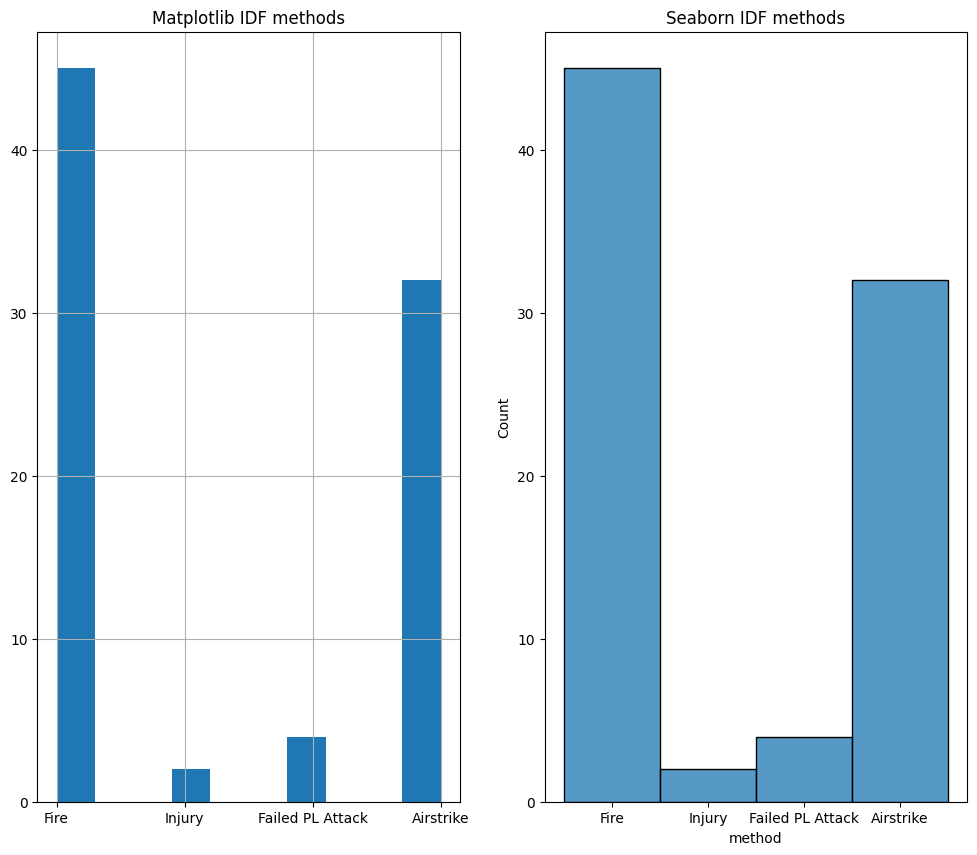

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,10))

#matplotlib histogram distribution of casualty ages
mathistoage = df['method'].hist(ax=axes[0])

#seaborn histogram distribution of casualty ages
histosnsage = sns.histplot(df['method'], ax=axes[1])

axes[0].set_title('Matplotlib IDF methods')
axes[1].set_title('Seaborn IDF methods')


plt.show()


<Axes: >

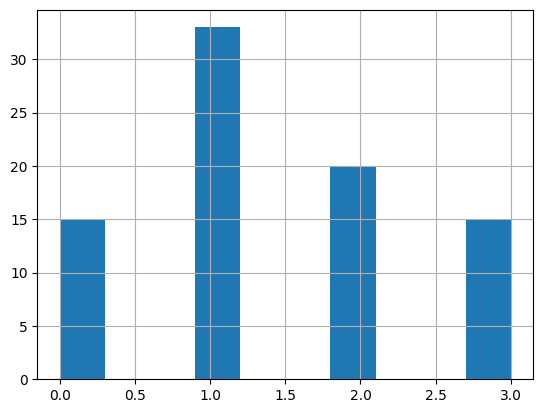

In [ ]:
df['offenses'].hist()

Inference

In [20]:
orgscount = df[df['terrorist'] == 1].groupby('affiliation').agg(totaloffenses = ('offenses', 'count'), avgage = ('age', 'mean')).reset_index()
orgscount

,affiliation,totaloffenses,avgage
0,Al-Mujahideen Brigades,2,27.500000
1,Fatah,2,21.500000
2,Hamas,4,21.250000
3,Multiple,1,22.000000
4,PFLP,8,24.625000
5,PIJ,32,28.718750
6,Unaffiliated,4,25.250000
7,Unknown,9,29.333333
8,al-Aqsa's Martyrs Brigades,6,23.666667


In [21]:
rolesinfo = df[df['terrorist']==1].groupby('role').agg(rolecount = ('role', 'count'), offensesavg = ('offenses', 'mean'), avage = ('age', 'mean')).reset_index()
rolesinfo
#most of the targets have committed more than one offense on average.
#Only 7/83 targets executed were considered high ranking, most of the casualties in this dataset are relatively young militants.

,role,rolecount,offensesavg,avage
0,Commander,3,3.000000,45.333333
1,Militant,53,1.679245,24.415094
2,Military Engineer,1,1.000000,17.000000
3,Officer,1,3.000000,51.000000
4,Operative,3,1.666667,30.000000
5,Secretary,1,1.000000,62.000000
6,Senior official,2,3.000000,50.500000
7,Terrorist associate,3,1.000000,21.333333


In [ ]:
orgscountavg.columns

Index(['affiliation', 'avgoffenses'], dtype='object')

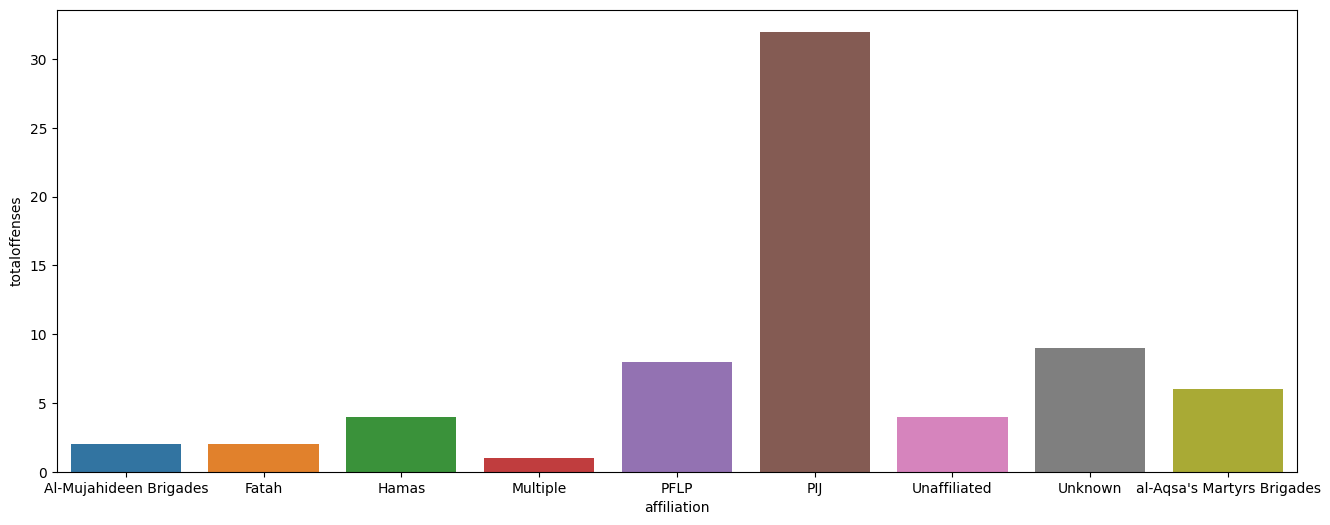

In [ ]:
fig, ax = plt.subplots(figsize =(16,6))

sns.barplot(x = 'affiliation', y = 'totaloffenses', data = orgscount)
plt.show()
"""
Most targets between January and August affiliated with Palestinian Islamic Jihad
Main target of IDF operations: PIJ
PIJ has been biggest problem for Israel's security?


"""


Majority of the casualties the IDF nuetralized in the months leading up to October 7th come from Palestinian Islamic Jihad. Most of the terrorists the Israeli forces have been confronting are militants. Although the IDF has been at war with Hamas in the Gaza Strip, there is still a growing presence of Islamic Jihad militants planning and committing attacks from Judea and Samaria.